In [3]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-12. Временные ряды. Часть I
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-12. Временные ряды. Часть I
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

# Отключаем DEBUG сообщения от matplotlib (особенно от font_manager при поиске шрифтов)
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)
logging.getLogger('PIL').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



23:31:20 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
23:31:20 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
23:31:20 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


## Инструменты для декомпозиции временного ряда

Разделить ряд на компоненты в Python можно с помощью библиотеки statsmodels. Если вы не устанавливали её ранее, это можно сделать стандартным способом (pip install statsmodels) или следуя рекомендациям в официальной документации.

В этом датасете представлены данные о количестве авиапассажиров в 1949-1960 годах. Рассмотрим некоторый временной ряд df из данного датасета.

In [7]:
df = pd.read_csv("./data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Теперь рассмотрим код, в котором демонстрируется, как применять декомпозицию к временному ряду df.

Декомпозиция выполняется методом seasonal_decompose(), который принимает на вход временной ряд с одним признаком. Индексом ряда должна быть дата или время. Именно поэтому, считывая датасет, мы указываем индексом столбец month и приводим его к формату даты. Также, если вы знаете, что в вашем временном ряду присутствует период, его вы также можете передать в качестве параметра в seasonal_decompose(). Более подробно о необязательных параметрах можно узнать в документации.

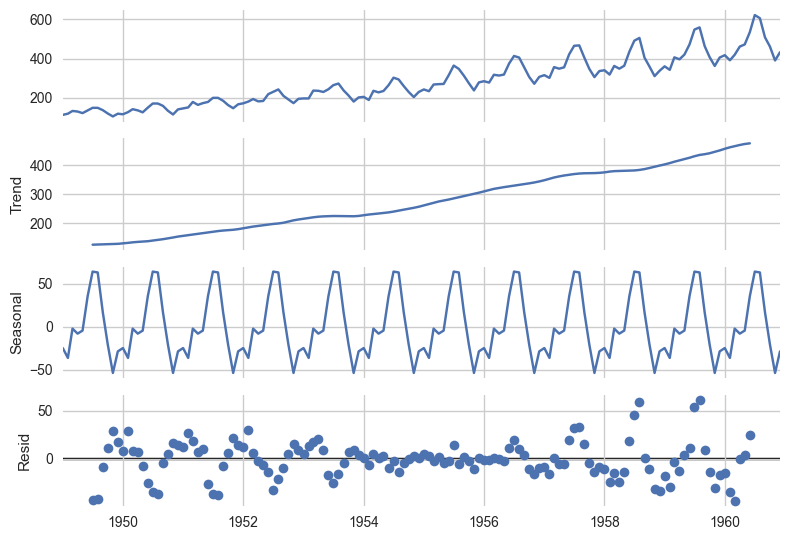

In [8]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

Как можно увидеть, по исходному ряду был получен тренд, выявлена некоторая сезонность и шум.

Отрабатывать навыки определения тренда, сезонности и шума и делать дальнейший анализ мы будем в итоговой практике, а пока давайте выполним несколько заданий и двинемся дальше ↓

## 4. Экспоненциальное сглаживание

Проще говоря, под экспоненциальным сглаживанием понимается взвешенная линейная сумма наблюдений, при этом веса для наблюдений экспоненциально уменьшаются для более старых наблюдений. Тем самым мы не обращаем особого внимания на поведение в прошлом, а недавнему поведению присваиваем больший вес. Если быть точнее, наблюдения взвешиваются с геометрически уменьшающимся коэффициентом.

Так, если значения температуры за последние пять дней были data = np.array([15, 20,25,30,25,27]) (в формуле это будет ряд Xt , при этом X0=15, X1=20 и т. д.), а коэффициент сглаживания α будет равен 0.7, то, подставив значения в формулу, получим значения сглаженного экспоненциального ряда: [15. , 18.5 , 23.05 , 27.915 , 25.8745 , 26.66235].

In [9]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


Так как по формуле значение для следующего дня рассчитывается от значения для текущего, мы можем продолжить получать следующие значения для экспоненциально сглаженного ряда, таким образом совершая прогноз (день за днём). В нашем примере для шестого дня мы получили прогнозируемое значение температуры в 26.6 градусов (26.66235, если быть точнее)

Коэффициент экспоненциального сглаживания подбирается **интуитивно**. Чем выше коэффициент, тем меньше внимания мы обращаем на старые данные. Если коэффициент близок к 0, данным в далёком прошлом будет уделено больше внимания. Так, при коэффициенте, равном 0.1, значения экспоненциально сглаженного ряда будут выглядеть так (сравните с предыдущим графиком)

В примере выше сглаженный ряд мы рассчитывали «вручную» по формуле, но делать это каждый раз нет необходимости, так как эта возможность уже встроена в библиотеку statsmodels. Для совершения предсказания методом простого экспоненциального сглаживания воспользуемся методом SimpleExpSmoothing из statsmodels.tsa.api.

In [10]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


## 5. Стационарность

### Статистические тесты на Python

Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является расширенный тест Дики — Фуллера. В тесте формулируется две гипотезы:

нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.
В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 5 %, 10 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

Рассмотрим пример проведения теста Дики — Фуллера на данных временного ряда Daily Total Female Births. В данных содержится количественная информация о девочках, рождённых за несколько месяцев. Для проведения теста будем использовать функцию adfuller() из пакета statsmodels.

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"./data/daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### Почему значения ADF-теста отрицательные?

**Важно понимать:** Отрицательные значения в тесте Дики-Фуллера — это **нормально и ожидаемо**! Это не ошибка, а особенность самого теста.

#### Как работает тест ADF:

1. **Тест проверяет наличие единичного корня** (unit root) в модели временного ряда
2. **Статистика ADF рассчитывается как t-статистика** для коэффициента в регрессионной модели
3. **Для стационарных рядов этот коэффициент отрицательный**, поэтому и статистика получается отрицательной

#### Интерпретация результатов:

**Правило принятия решения:**
- Если **ADF Statistic < Critical Value** (более отрицательное значение) → **отвергаем H0** → ряд **СТАЦИОНАРНЫЙ** ✅
- Если **ADF Statistic > Critical Value** (менее отрицательное значение) → **принимаем H0** → ряд **НЕСТАЦИОНАРНЫЙ** ❌

**Ваш случай:**
- ADF Statistic: **-4.808**
- Critical Values: -3.449 (1%), -2.870 (5%), -2.571 (10%)
- **-4.808 < -3.449** (и меньше всех критических значений!)
- **p-value: 0.000052** (очень маленькое, < 0.05)

**Вывод:** Ряд **стационарный** с высокой степенью уверенности! ✅

Чем более отрицательное значение статистики, тем сильнее доказательство стационарности ряда.


In [12]:
# Автоматическая интерпретация результатов ADF-теста
def interpret_adf_result(result):
    """
    Интерпретирует результаты теста Дики-Фуллера
    
    Parameters:
    result - результат функции adfuller()
    
    Returns:
    Строка с интерпретацией
    """
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    print("=" * 60)
    print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ADF-ТЕСТА")
    print("=" * 60)
    print(f"\nADF Statistic: {adf_statistic:.4f}")
    print(f"p-value: {p_value:.6f}")
    print("\nКритические значения:")
    for key, value in critical_values.items():
        print(f"  {key}: {value:.3f}")
    
    print("\n" + "-" * 60)
    print("АНАЛИЗ:")
    print("-" * 60)
    
    # Проверяем по критическим значениям
    is_stationary_by_critical = False
    significance_level = None
    
    if adf_statistic < critical_values['1%']:
        is_stationary_by_critical = True
        significance_level = "1%"
        print(f"✅ ADF Statistic ({adf_statistic:.4f}) < Critical Value 1% ({critical_values['1%']:.3f})")
        print("   → Ряд СТАЦИОНАРНЫЙ (уровень значимости 1%)")
    elif adf_statistic < critical_values['5%']:
        is_stationary_by_critical = True
        significance_level = "5%"
        print(f"✅ ADF Statistic ({adf_statistic:.4f}) < Critical Value 5% ({critical_values['5%']:.3f})")
        print("   → Ряд СТАЦИОНАРНЫЙ (уровень значимости 5%)")
    elif adf_statistic < critical_values['10%']:
        is_stationary_by_critical = True
        significance_level = "10%"
        print(f"✅ ADF Statistic ({adf_statistic:.4f}) < Critical Value 10% ({critical_values['10%']:.3f})")
        print("   → Ряд СТАЦИОНАРНЫЙ (уровень значимости 10%)")
    else:
        print(f"❌ ADF Statistic ({adf_statistic:.4f}) > Critical Values")
        print("   → Ряд НЕСТАЦИОНАРНЫЙ")
    
    # Проверяем по p-value
    print(f"\nПо p-value:")
    if p_value < 0.01:
        print(f"✅ p-value ({p_value:.6f}) < 0.01 → Ряд стационарный (99% уверенность)")
    elif p_value < 0.05:
        print(f"✅ p-value ({p_value:.6f}) < 0.05 → Ряд стационарный (95% уверенность)")
    elif p_value < 0.10:
        print(f"⚠️  p-value ({p_value:.6f}) < 0.10 → Ряд стационарный (90% уверенность)")
    else:
        print(f"❌ p-value ({p_value:.6f}) >= 0.10 → Ряд нестационарный")
    
    print("\n" + "=" * 60)
    if is_stationary_by_critical and p_value < 0.05:
        print("ИТОГОВЫЙ ВЫВОД: Ряд СТАЦИОНАРНЫЙ ✅")
    elif is_stationary_by_critical:
        print("ИТОГОВЫЙ ВЫВОД: Ряд вероятно стационарный ⚠️")
    else:
        print("ИТОГОВЫЙ ВЫВОД: Ряд НЕСТАЦИОНАРНЫЙ ❌")
        print("Рекомендация: примените дифференцирование (diff()) для стационаризации")
    print("=" * 60)
    
    return is_stationary_by_critical

# Применяем функцию к нашим результатам
interpret_adf_result(result)


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ADF-ТЕСТА

ADF Statistic: -4.8083
p-value: 0.000052

Критические значения:
  1%: -3.449
  5%: -2.870
  10%: -2.571

------------------------------------------------------------
АНАЛИЗ:
------------------------------------------------------------
✅ ADF Statistic (-4.8083) < Critical Value 1% (-3.449)
   → Ряд СТАЦИОНАРНЫЙ (уровень значимости 1%)

По p-value:
✅ p-value (0.000052) < 0.01 → Ряд стационарный (99% уверенность)

ИТОГОВЫЙ ВЫВОД: Ряд СТАЦИОНАРНЫЙ ✅


True

### Что делать, если ряд нестационарный?

Если тест на стационарность показал, что ряд нестационарный и в нём присутствуют тренд и сезонность, необходимо избавиться от них.

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется интегрированным рядом первого порядка.

Для определения порядка интегрированного ряда необходимо сделать следующее:

1. Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):

df_diff_1 = df.diff().dropna()

2. Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):

test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

Если полученный ряд нестационарен, можно провести эту процедуру ещё раз, то есть ещё раз дифференцировать разность ряда, полученную на предыдущем этапе.

Если после двукратного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом второго порядка, и так далее.

Запомните этот момент: в юните об авторегрессии нам пригодится порядок разности, приводящий ряд к стационарности.

## AR-моделирование на Python

Для загрузки класса ar_model.AutoReg, который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

Ниже приведены некоторые из ключевых шагов, которые необходимо выполнить для обучения AR-модели:

Отобразить временной ряд.
Проверить ряд на стационарность (модель AR можно применять только к стационарному временному ряду).
Выбрать параметр p (порядок модели AR).
Обучить модель.
Все эти шаги вы будете выполнять в итоговой практике, а пока давайте перейдём к самому инструменту моделирования.

Применим авторегрессионную модель к датасету по производству возобновляемой энергии в Германии. Набор данных включает общую информацию о потреблении электроэнергии в стране, а также о производстве ветровой и солнечной энергии за 2006–2017 годы.

Признаки в данных:

Date — дата (в формате гггг-мм-дд);

Consumption — потребление электроэнергии (ГВтч);

Wind — производство ветровой энергии (ГВтч);

Solar — производство солнечной энергии (ГВтч);

Wind+Solar — сумма производства ветровой и солнечной энергии (ГВтч).

В качестве примера построим предсказание объёма потребления электроэнергии на три месяца (возьмём последние 100 дней).

Импортируем необходимые библиотеки и загрузим датасет с данными.

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

Проведём тест на стационарность.

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Consumption'].values)

if result[0] > result[4]['5%']: 
    print ('Ряд нестационарен')
else:
    print ('Ряд стационарен')

Ряд стационарен


При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [15]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [16]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 24 Nov 2025   AIC                          48483.625
Time:                        23:31:26   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод predict требует два обязательных параметра — метки начала и окончания предсказания. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна len(train_data)+100, что эквивалентно len(df)-1, так как len(df) = len(train_data) + len(test_data).

In [17]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

In [18]:
display(pred)

4283    1199.580761
4284    1132.051688
4285    1392.772651
4286    1425.877770
4287    1424.606502
           ...     
4378    1355.220188
4379    1359.014426
4380    1334.516355
4381    1299.851112
4382    1309.602440
Length: 100, dtype: float64

Существуют и альтернативные AR-методы прогнозирования временных рядов:

МА (скользящее среднее),

ARMA (авторегрессионное скользящее среднее),

ARIMA (авторегрессионное интегрированное скользящее среднее),

SARIMA (сезонное авторегрессионное интегрированное скользящее среднее),

VAR (векторная авторегрессия),

VARMA (скользящее среднее векторной авторегрессии),

SES (простое экспоненциальное сглаживание, которое мы рассмотрели в юните 4).

В следующем модуле мы рассмотрим самые известные методы прогнозирования, а сейчас самое время закрепить полученные знания на практике →